# Case 1 - Input = 1 and Output = Multiple

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model # Functional API
from keras.models import Sequential # Sequential API
from keras.layers import *

In [ ]:
#model = Sequential()
# Objective is below - Functional API
# model = Model(inputs=x, outputs=[output1, output2, output3])

In [4]:
x = Input(shape=(1,))
x.shape

TensorShape([None, 1])

In [5]:
hidden1 = Dense(28, activation='relu')(x)
hidden2 = Dense(28, activation='relu')(hidden1)
output1 = Dense(1, activation='linear')(hidden2)
output2 = Dense(1, activation='sigmoid')(hidden2)
output3 = Dense(10, activation='softmax')(hidden2)
model = Model(inputs=x, outputs=[output1, output2, output3])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 dense_5 (Dense)             (None, 28)                   56        ['input_2[0][0]']             
                                                                                                  
 dense_6 (Dense)             (None, 28)                   812       ['dense_5[0][0]']             
                                                                                                  
 dense_7 (Dense)             (None, 1)                    29        ['dense_6[0][0]']             
                                                                                            

In [6]:
from keras.utils import plot_model

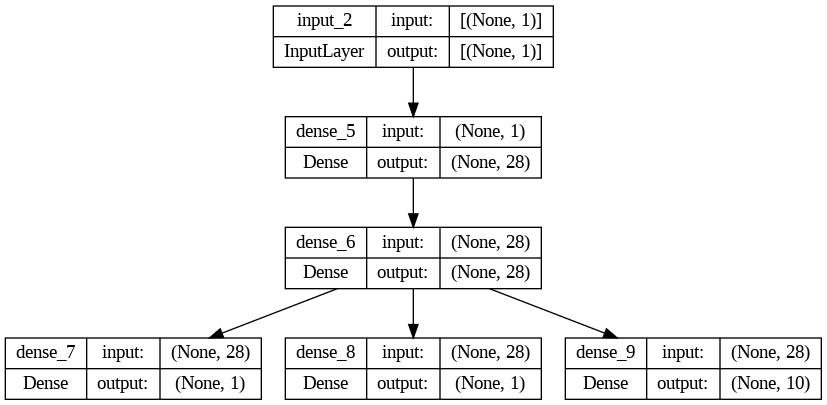

In [8]:
plot_model(model, show_shapes=True)

# Case 2 : inputs = many, output= 1
#### input 1 = tabular data
#### input 2 = text data
#### input 3 = image data
#### Ask here to predict price basis the given 3 inputs

In [9]:
# Defining mutliple inputs
input1 = Input(shape=(32,))
input2 = Input(shape=(128,))
input3 = Input(shape=(256,))

In [11]:
# input 1 connected with 2 hidden layer
hiddenx1 = Dense(8, activation='relu')(input1)
hiddenx2 = Dense(28, activation='relu')(hiddenx1)

# input 2 connected with 3 hidden layer
hiddeny1 = Dense(32, activation='relu')(input2)
hiddeny2 = Dense(16, activation='relu')(hiddeny1)
hiddeny3 = Dense(8, activation='relu')(hiddeny2)

# input 3 connected with 2 hidden layer
hiddenz1 = Dense(256, activation='relu')(input3)
hiddenz2 = Dense(128, activation='relu')(hiddenz1)

# combined
combined = concatenate([hiddenx2,hiddeny3, hiddenz2])

# after combining all three different input data, we have to connect with new hidden layer

mod = Dense(16, activation='relu')(combined)

# output
model = Model(inputs=[input1, input2, input3], outputs=mod)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, 32)]                 0         []                            
                                                                                                  
 dense_14 (Dense)            (None, 32)                   4128      ['input_4[0][0]']             
                                                                                                  
 input_5 (InputLayer)        [(None, 256)]                0         []                            
                                                                                            

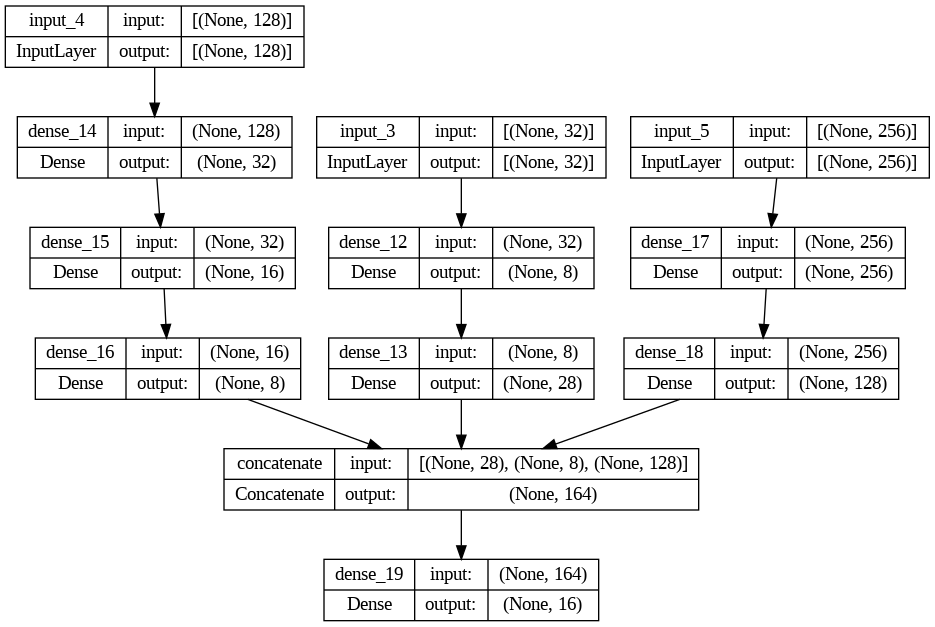

In [12]:
plot_model(model, show_shapes=True)

# Real Time Project - Kaggle dataset
# https://www.kaggle.com/datasets/muhammadardiputra/utkface-dataset

In [13]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [14]:
!kaggle datasets download -d muhammadardiputra/utkface-dataset

Dataset URL: https://www.kaggle.com/datasets/muhammadardiputra/utkface-dataset
License(s): unknown
100% 331M/331M [00:19<00:00, 21.2MB/s]
100% 331M/331M [00:19<00:00, 17.6MB/s]


In [17]:
import zipfile
zip = zipfile.ZipFile("/content/utkface-dataset.zip",'r')
zip.extractall("/content")
zip.close()

In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [20]:
folder_path = "/content/utkface_aligned_cropped/UTKFace"

In [25]:
age = []
gender = []
emotion = []
img_path = []
for file in os.listdir(folder_path):
  age.append(int(file.split('_')[0]))
  gender.append(int(file.split('_')[1]))
  emotion.append(int(file.split('_')[2][0]))
  img_path.append(file)

In [26]:
print(len(age))
print(len(gender))
print(len(emotion))
print(len(img_path))

23708
23708
23708
23708


In [27]:
df = pd.DataFrame({'age':age, 'gender':gender,
                   "emotion":emotion,"img":img_path})

In [28]:
df.head()

,age,gender,emotion,img
0,2,1,3,2_1_3_20161219225311520.jpg.chip.jpg
1,45,1,3,45_1_3_20170119183505494.jpg.chip.jpg
2,35,0,3,35_0_3_20170119201342436.jpg.chip.jpg
3,16,1,4,16_1_4_20170102234841875.jpg.chip.jpg
4,60,1,0,60_1_0_20170110141759687.jpg.chip.jpg


In [42]:
df['emotion'].value_counts()

emotion
0    10078
1     4526
3     3975
2     3437
4     1692
Name: count, dtype: int64

In [29]:
train_df = df.sample(frac=1, random_state=0).iloc[:20000]
test_df = df.sample(frac=1, random_state=0).iloc[20000:]

In [30]:
print(train_df.shape, test_df.shape)

(20000, 4) (3708, 4)


In [31]:
# Making data into translation invariance (data augmentation)
train_datagen = ImageDataGenerator(rotation_range = 30, width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2, zoom_range = 0.3,
                                   channel_shift_range = 0.2,
                                   fill_mode = "nearest",
                                   horizontal_flip = True,
                                   vertical_flip = True, rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [32]:
train_generator = train_datagen.flow_from_dataframe(train_df,directory = folder_path,
                                                    x_col='img', y_col=['age','gender','emotion'],
                                                    target_size=(200,200),
                                                    class_mode='multi_output')

test_generator = test_datagen.flow_from_dataframe(test_df,directory = folder_path,
                                                    x_col='img', y_col=['age','gender','emotion'],
                                                    target_size=(200,200),
                                                    class_mode='multi_output')

Found 20000 validated image filenames.
Found 3708 validated image filenames.


# Build model
# Lenet-5, AlexNet
# Best model = VGG16, ResNet, Inception

In [34]:
# One of the best pre-trained model - VGG16
from keras.applications.vgg16 import VGG16
from keras.layers import *
from keras.models import Model

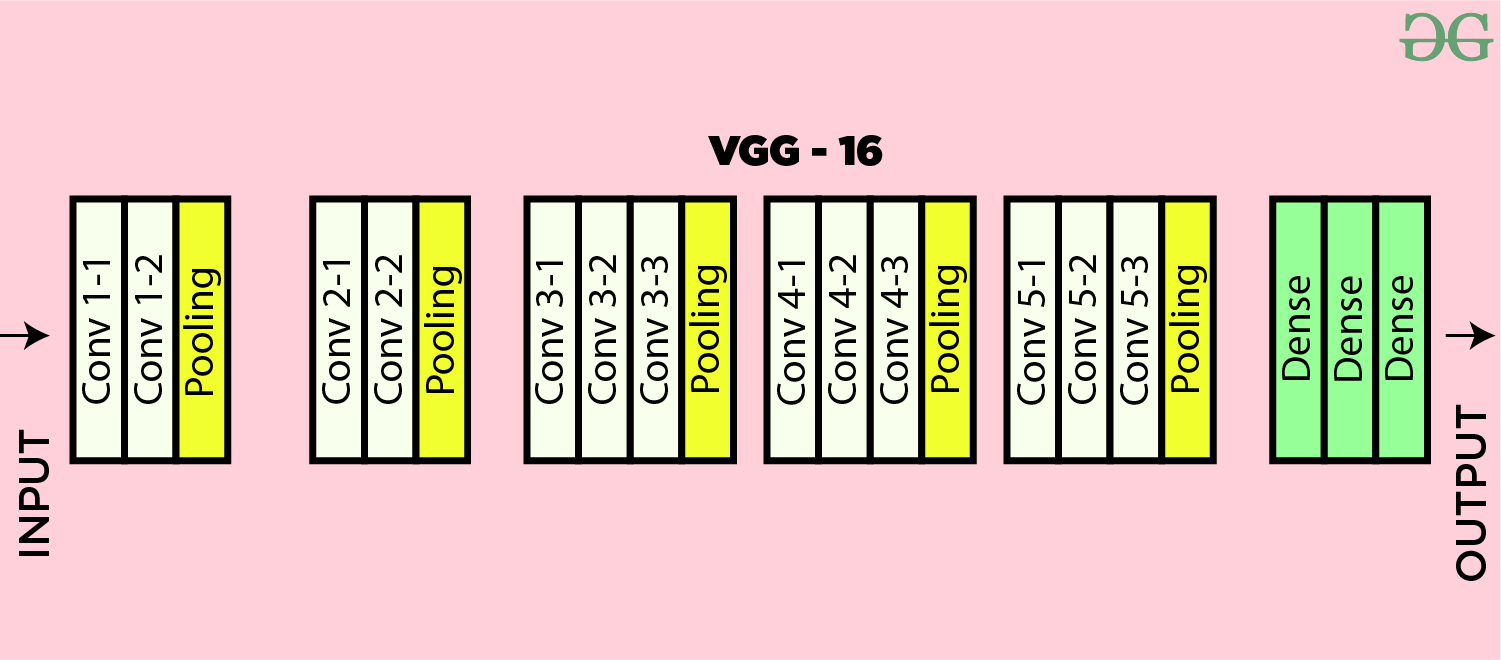

In [37]:
vgg16_model = VGG16(include_top=False, weights="imagenet",input_shape=(200,200,3) )
vgg16_model.trainable = False
output = vgg16_model.layers[-1].output
flatten = Flatten()(output)

# age
dense1 = Dense(512, activation='relu')(flatten)
# gender
dense2 = Dense(512, activation='relu')(flatten)
# emotion
dense3 = Dense(512, activation='relu')(flatten)

# dense4 connect with age
dense4 = Dense(512, activation='relu')(dense1)
# dense5 connect with gendre
dense5 = Dense(512, activation='relu')(dense2)

# dense6 connect with emotion
dense6 = Dense(512, activation='relu')(dense3)

# output
# 1) regression
output1 = Dense(1, activation='linear', name='age')(dense4)
# 2) binary class
output2 = Dense(1, activation='sigmoid', name='gender')(dense5)
# 3) multiclass classif.
output3 = Dense(5, activation='softmax', name='emotion')(dense6)

# Functional API
model = Model(inputs=vgg16_model.input, outputs=[output1, output2, output3])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 200, 200, 64)         1792      ['input_8[0][0]']             
                                                                                                  
 block1_conv2 (Conv2D)       (None, 200, 200, 64)         36928     ['block1_conv1[0][0]']        
                                                                                                  
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)         0         ['block1_conv2[0][0]']        
                                                                                            

In [40]:
model.compile(optimizer='adam', loss={'age':'mae', 'gender':'binary_crossentropy',
                                      'emotion':'sparse_categorical_crossentropy'},
              metrics = {'age':'mae', 'gender':'accuracy', 'emotion':'accuracy'})

In [41]:
history = model.fit(train_generator, batch_size=32, epochs=10, validation_data=test_generator)

Epoch 1/10
625/625 [==============================] - 272s 417ms/step - loss: nan - age_loss: 11.6924 - gender_loss: 0.5893 - emotion_loss: nan - age_mae: 11.6924 - gender_accuracy: 0.7045 - emotion_accuracy: 0.4263 - val_loss: nan - val_age_loss: 10.6309 - val_gender_loss: 0.4300 - val_emotion_loss: nan - val_age_mae: 10.6309 - val_gender_accuracy: 0.8007 - val_emotion_accuracy: 0.4175
Epoch 2/10
625/625 [==============================] - 257s 412ms/step - loss: nan - age_loss: 10.4364 - gender_loss: 0.5106 - emotion_loss: nan - age_mae: 10.4364 - gender_accuracy: 0.7505 - emotion_accuracy: 0.4265 - val_loss: nan - val_age_loss: 9.1818 - val_gender_loss: 0.4163 - val_emotion_loss: nan - val_age_mae: 9.1818 - val_gender_accuracy: 0.8037 - val_emotion_accuracy: 0.4175
Epoch 3/10
625/625 [==============================] - 264s 423ms/step - loss: nan - age_loss: 9.9444 - gender_loss: 0.4834 - emotion_loss: nan - age_mae: 9.9444 - gender_accuracy: 0.7645 - emotion_accuracy: 0.4265 - val_lo